# Gene Expression Profiling of Breast Cancer

## Imports

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
from operator import itemgetter

## Data Preparation

In [5]:
everything = defaultdict(list)
all_keys = []

G = nx.Graph()
file = "datasets/gene_expression_dataset.txt"

with open(file) as f:
    first_line = f.readline()
    for line in f:
        m = line.strip("\n").split("\t")
        everything[m[0]] = m[1:]
        all_keys.append(m[0])

threshold = 0.9

for key, value in everything.items():
    for key1, value1 in everything.items():
        if key != key1:
            first_value = [float(v) for v in value]
            second_value = [float(v) for v in value1]

            values = round(np.corrcoef(first_value, second_value)[1, 0], 4)

            # If pcc is greater than some threshold, draw an edge                                  
            if values > threshold:
                G.add_edge(key, key1)

nx.write_edgelist(G, "datasets/edge_list_90.txt", data=False)

In [9]:
edge_list_path = 'datasets/edge_list_75.txt'
G = nx.Graph()

with open(edge_list_path, 'r') as file:
    for line in file:
        node1, node2 = line.strip().split()
        G.add_edge(node1, node2)

## Visualization

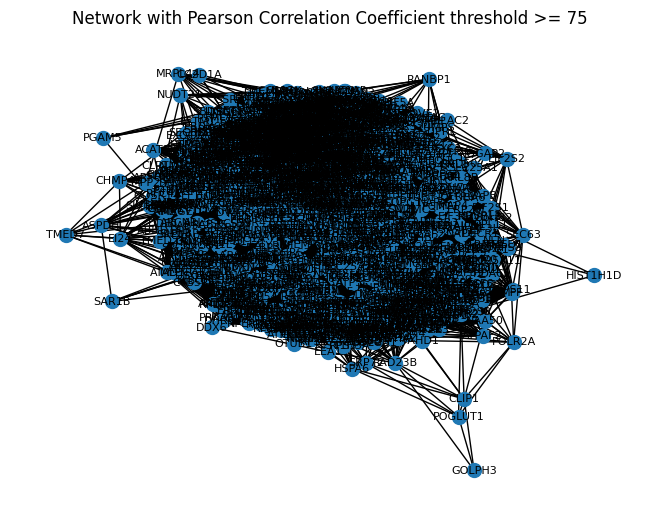

In [10]:
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100, font_color='black', alpha=1.0)
plt.title("Network with Pearson Correlation Coefficient threshold >= 75")
plt.show()

## Degree Centrality Distribution

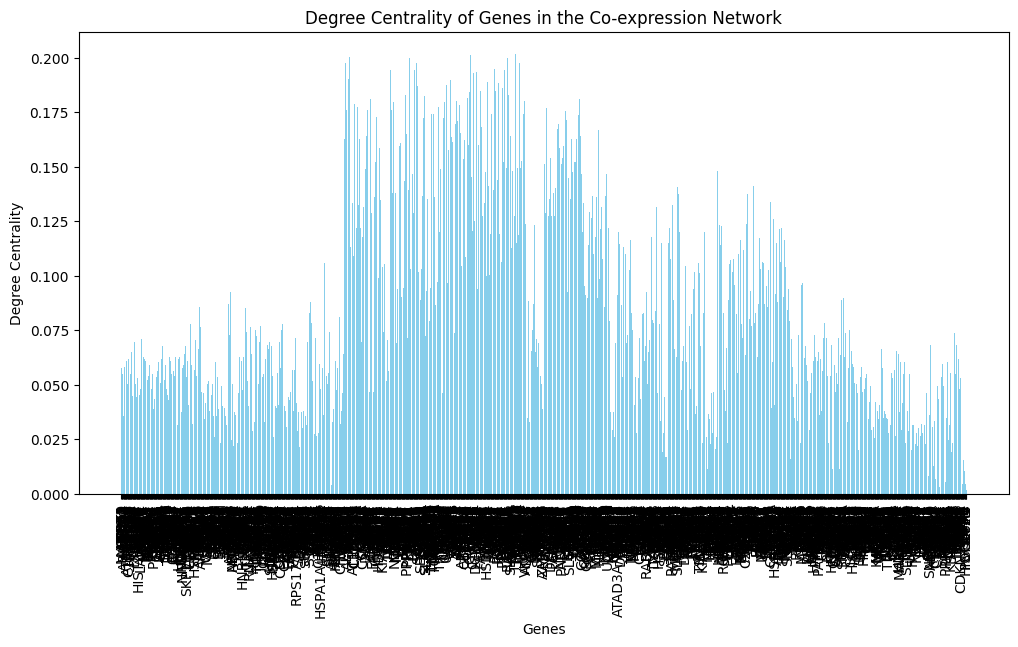

In [11]:
degree_centrality = nx.degree_centrality(G)

plt.figure(figsize=(12, 6))
plt.bar(degree_centrality.keys(), degree_centrality.values(), color='skyblue')
plt.title('Degree Centrality of Genes in the Co-expression Network')
plt.xlabel('Genes')
plt.ylabel('Degree Centrality')
plt.xticks(rotation = 90)
plt.show()

## Degree Distribution

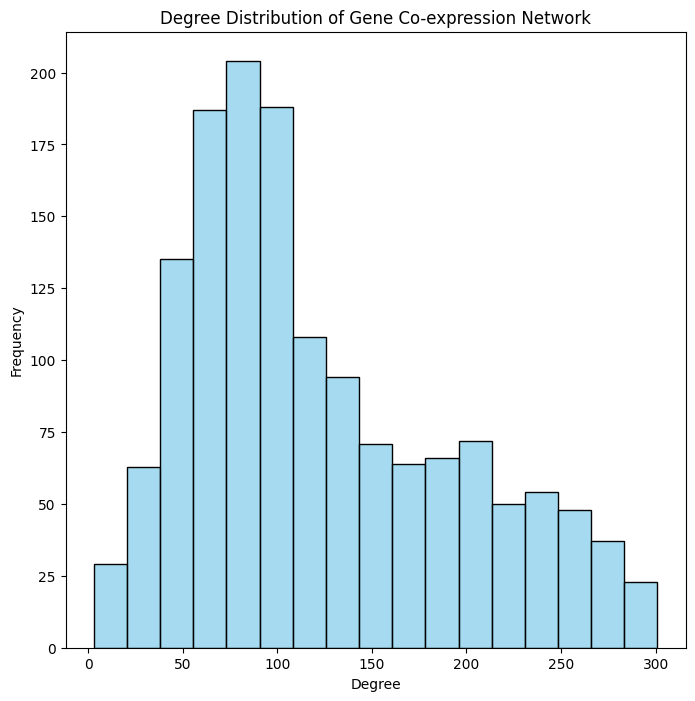

In [12]:
# Calculate degree for each node
degrees = dict(G.degree())

# Plot degree distribution
plt.figure(figsize=(8, 8))
sns.histplot(list(degrees.values()), kde=False, color='skyblue')
plt.title('Degree Distribution of Gene Co-expression Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

## Number of Nodes in the network

In [13]:
nx.number_of_nodes(G)

1493

## Number of Edges in the network

In [14]:
nx.number_of_edges(G)

91622

## Betweenness Centrality

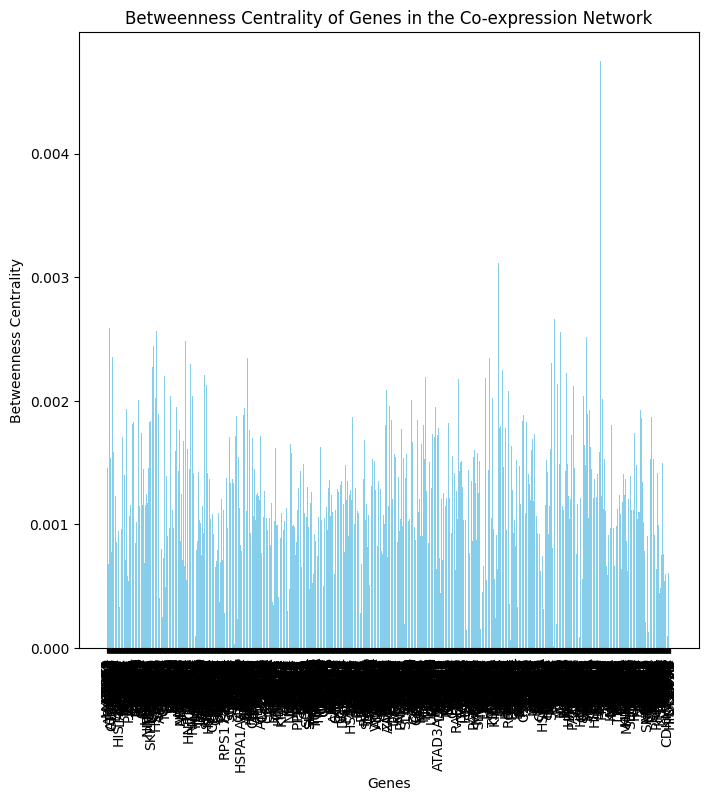

In [15]:
betweenness_centrality = nx.betweenness_centrality(G)

plt.figure(figsize=(8, 8))
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color='skyblue')
plt.title('Betweenness Centrality of Genes in the Co-expression Network')
plt.xlabel('Genes')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.show()

## Clustering Coefficient of each node

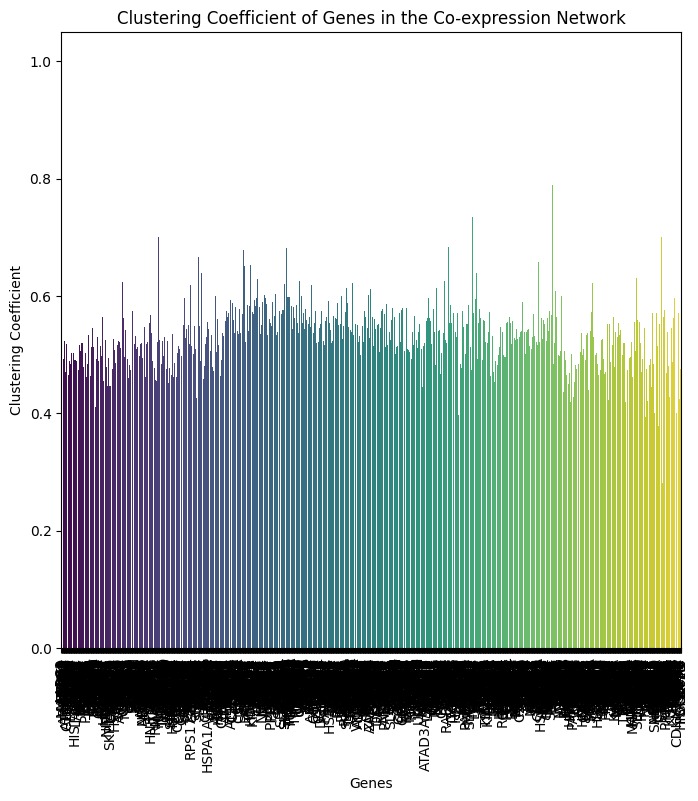

In [17]:
clustering_coefficients = nx.clustering(G)

clustering_coefficients_df = pd.DataFrame(list(clustering_coefficients.items()), columns=['Gene', 'Clustering Coefficient'])

plt.figure(figsize=(8, 8))
sns.barplot(x='Gene', y='Clustering Coefficient', hue='Gene', data=clustering_coefficients_df, palette='viridis', legend=False)
plt.title('Clustering Coefficient of Genes in the Co-expression Network')
plt.xlabel('Genes')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=90)
plt.show()

## Average Clustering Coefficient

In [18]:
average_clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.4f}")

Average Clustering Coefficient: 0.5332


## Degree Correlation Coefficient

In [19]:
degree_correlation_coefficient = nx.degree_assortativity_coefficient(G)
print(f"Degree Correlation Coefficient: {degree_correlation_coefficient:.4f}")

Degree Correlation Coefficient: 0.7085


## Closeness Centrality

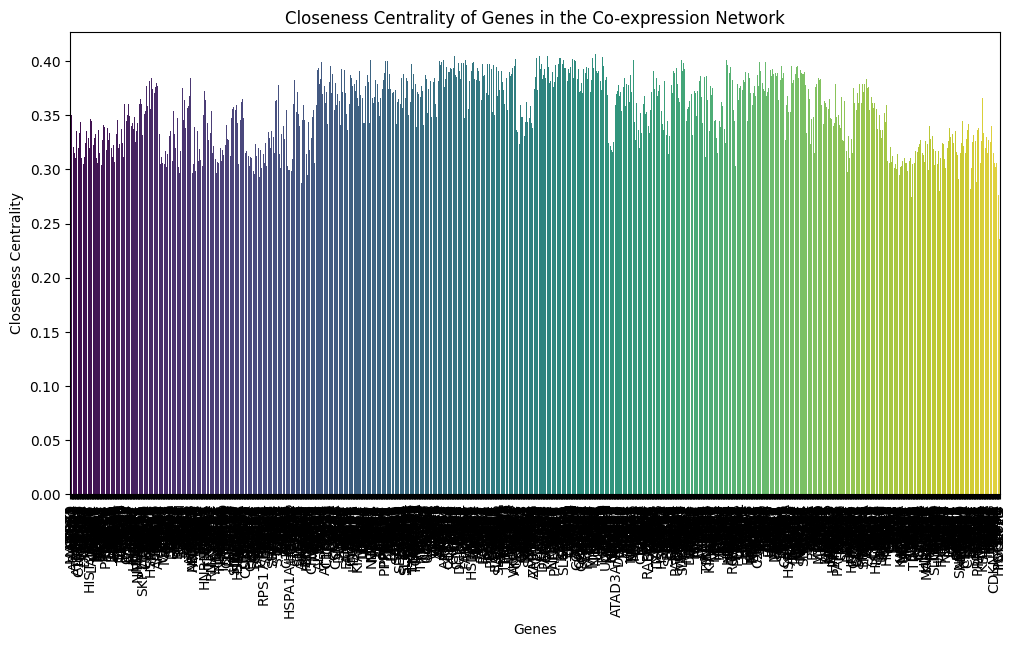

In [20]:
closeness_centrality = nx.closeness_centrality(G)

closeness_centrality_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Gene', 'Closeness Centrality'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Gene', y='Closeness Centrality', data=closeness_centrality_df, hue='Gene', palette='viridis', legend = False)
plt.title('Closeness Centrality of Genes in the Co-expression Network')
plt.xlabel('Genes')
plt.ylabel('Closeness Centrality')
plt.xticks(rotation=90)
plt.show()

## Clustering Modularity 

In [21]:
import community as community_louvain

cm = community_louvain.best_partition(G)
mod = community_louvain.modularity(cm, G)
print("Clustering Modularity: ", mod)

Clustering Modularity:  0.451901046569216


## Identification of hubs

In [22]:
hubs = sorted(G.degree(), key = itemgetter(1), reverse=True)

print("Top 10 hubs are: ")
for hub in range(10):
    print(hub, ":", hubs[hub][0])

Top 10 hubs are: 
0 : TLN1
1 : NCLN
2 : CORO1C
3 : ANXA5
4 : PSMA7
5 : RANGAP1
6 : PRKACA
7 : ACTG1
8 : RQCD1
9 : TUBB


## Size of biggest cluster

In [23]:
connected_components = list(nx.connected_components(G))
largest_component = max(connected_components, key=len)

print("Size of the largest connected component:", len(largest_component))

Size of the largest connected component: 1493


## Finding common genes

In [71]:
# Convert these measures into sorted DataFrames
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Gene', 'Degree Centrality']).nlargest(15, 'Degree Centrality')
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Gene', 'Betweenness Centrality']).nlargest(15, 'Betweenness Centrality')
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Gene', 'Closeness Centrality']).nlargest(15, 'Closeness Centrality')
df_clustering_coefficient = pd.DataFrame(clustering_coefficients.items(), columns=['Gene', 'Clustering Coefficient']).nlargest(15, 'Clustering Coefficient')

In [73]:
genes_degree_centrality = set(df_degree_centrality['Gene'])
genes_betweenness_centrality = set(df_betweenness_centrality['Gene'])
genes_closeness_centrality = set(df_closeness_centrality['Gene'])
genes_clustering_coefficient = set(df_clustering_coefficient['Gene'])

map = {1: genes_degree_centrality, 2: genes_betweenness_centrality, 3: genes_clustering_coefficient, 4: genes_closeness_centrality}

mapstr = {1: "genes_degree_centrality", 2: 'genes_betweenness_centrality', 3: 'genes_clustering_coefficient', 4: 'genes_betweenness_centrality'}

for i in range (1, 4):
    for j in range (i+1, 5):
        common_genes = map[i] & map[j]
        common_genes_list = list(common_genes)
        print(mapstr[i], mapstr[j])
        print(common_genes_list)

genes_degree_centrality genes_betweenness_centrality
[]
genes_degree_centrality genes_clustering_coefficient
[]
genes_degree_centrality genes_betweenness_centrality
['RANGAP1', 'AP1M1', 'TLN1', 'CORO1C', 'TUBB']
genes_betweenness_centrality genes_clustering_coefficient
[]
genes_betweenness_centrality genes_betweenness_centrality
[]
genes_clustering_coefficient genes_betweenness_centrality
[]


## Top 15 Genes

In [51]:
print("Top 15 Genes in Degree Centrality")
df_degree_centrality

Top 15 Genes in Degree Centrality


,Gene,Degree Centrality
696,TLN1,0.201743
482,NCLN,0.201072
617,CORO1C,0.201072
403,ANXA5,0.200402
509,PSMA7,0.199732
682,RANGAP1,0.199732
506,PRKACA,0.199062
396,ACTG1,0.197721
521,RQCD1,0.197721
703,TUBB,0.197721


In [52]:
print("Top 15 Genes in Betweenness Centrality ")
df_betweenness_centrality

Top 10 Genes in Betweenness Centrality 


,Gene,Betweenness Centrality
1307,PHB2,0.004747
1306,C7orf55,0.003689
1025,NARS,0.003641
1269,MCM7,0.003488
717,C22orf28,0.003272
987,GNL1,0.003152
1037,ARL8B,0.003111
1213,PRDX3,0.002933
1226,PRPF38B,0.002931
1464,KHDRBS1,0.002925


In [56]:
print("Top 15 Genes in Closeness Centrality")
df_closeness_centrality

Top 15 Genes in Closeness Centrality


,Gene,Closeness Centrality
703,TUBB,0.406761
843,NCAPG,0.406429
677,PSMD14,0.406097
682,RANGAP1,0.405325
617,CORO1C,0.405215
751,CAPZA1,0.404995
766,GSTO1,0.404885
627,DEK,0.404775
753,CNP,0.404665
854,STX7,0.403570


In [57]:
print("Top 15 Genes in Clustering Coefficient")
df_clustering_coefficient

Top 15 Genes in Clustering Coefficient


,Gene,Clustering Coefficient
1492,GOLPH3,1.000000
1350,RPS8,0.867692
381,ASPDH,0.830882
1395,ATPAF2,0.813793
1461,PGP,0.812312
1182,ACAT1,0.789855
885,KPNA6,0.757595
990,MBLAC2,0.734921
1454,RPL29,0.731765
1068,MRPL44,0.730769
